This file contains the computing of the spatial autocorrelation with Moran's I

In [2]:
# Import all the needed libraries for calculating Moran's I 

import seaborn as sns
import pandas as pd
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

c:\Users\rober\AppData\Local\Programs\Python\Python312\Lib\site-packages\spaghetti\network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
c:\Users\rober\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Loading and reading the datafile

file_path = 'C:\\Users\\rober\\OneDrive\\المستندات\\MADE Metropolitan Data 1 Assignments Robert\\brexit.gpkg'

brexit = gpd.read_file(file_path)

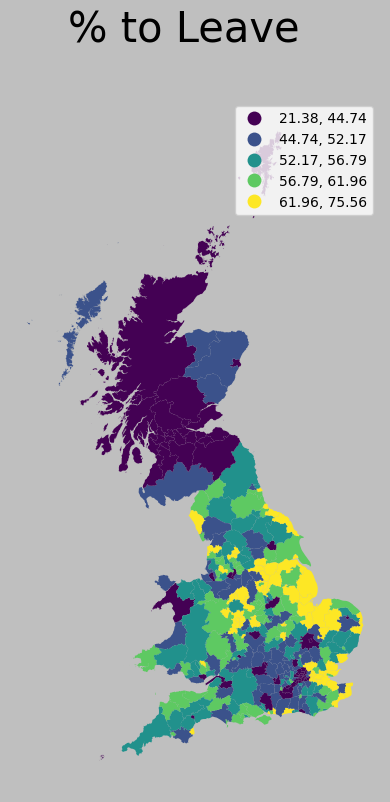

In [10]:
# Creating a basis choropleth map of the data

# Set up figure and axis. One figure and one axis is used in the plot with 9 inches for both the width and length creating a square.
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot of a specific column. Pct-Leave can be replaced here with the data we are working with.
# 'Quantiles' means the data will be divided into equal-sized groups based on quantiles (e.g., quartiles, quintiles, etc.). 
# This is useful for visualizing data distributions where each color represents a specific quantile range (e.g., 25% of the regions with the lowest values are in one color, the next 25% in another, etc.).
# A legend is included with legend=True
# ax=ax allows you to place the map plot on a specific figure and axes, as opposed to letting geopandas create its own figure.
brexit.plot(column='Pct_Leave', scheme='Quantiles', 
        legend=True, ax=ax)

# Remove axis frame
ax.set_axis_off()

# Change background color of the figure
f.set_facecolor('0.75')

# Title
f.suptitle('% to Leave', size=30)

# Draw
plt.show()

In [11]:
# Building a Continuity-Based Weight Matrix

# Import the Queen function from the respective library
from libpysal.weights import Queen

# Define the function
def construct_queen_weight_matrix(brexit):
    """
    1. This line of code filters out the invalid rows of the geodataframe. Invalid values could include intersections between areas and themselves for example.
        The rectangular brackets function as a filter, where the 'is_valid' term could be seen as a 'True' statement creating Boolean values.
    2. The term 'Queen' creates a Queen continuity weight matrix. This matrix is based on whether two different areas either border and/or corner each other.
        The 'Queen' function is used on the selected geodataframe (gdf) and named queen_w. Ultimatly this value is returned.
    """

    brexit = brexit[brexit.is_valid]

    queen_w = Queen.from_dataframe(brexit)

    return queen_w

In [14]:
# Printing the given continuity-based weight matrix to show what the matrix looks like. It can be interesting to see what output is given.
# The .full()[0] provides the first row that is full of the weight matrix. Therein, it can provide a better output example than a row that is not.
# Other than this line of code calls to print the weight matrix function.

print(construct_queen_weight_matrix(brexit).full()[0])

C:\Users\rober\AppData\Local\Temp\ipykernel_19020\4279239000.py:17: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  queen_w = Queen.from_dataframe(brexit)


[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


c:\Users\rober\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 6 islands with ids: 45, 51, 331, 339, 342, 358.
  W.__init__(self, neighbors, ids=ids, **kw)
